In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data.head()
# Combine the data into a single dataset
mouse_trial = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="left")

# Display the data table for preview
# Remove Mouse ID g989 because it was listed under 2 medications. Makeing Mouse ID NOT a unique key.
mouse_trial = mouse_trial.loc[mouse_trial["Mouse ID"]!="g989"]
mouse_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mouse_trial_grouped = mouse_trial.groupby(["Drug","Timepoint"])
mean_tumor = mouse_trial_grouped[["Tumor Volume (mm3)"]].mean()

# Convert to DataFrame
tumor_response_to_treatment = pd.DataFrame(mean_tumor)
tumor_response_to_treatment.reset_index(inplace=True) 

# Preview DataFrame
tumor_response_to_treatment.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_value = (mouse_trial_grouped["Tumor Volume (mm3)"]).sem()
# Convert to DataFrame
sem_value_df = pd.DataFrame(sem_value)
# Preview DataFrame
sem_value_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_pivot = tumor_response_to_treatment.pivot_table("Tumor Volume (mm3)", "Timepoint","Drug")

# Preview that Reformatting worked
tumor_response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


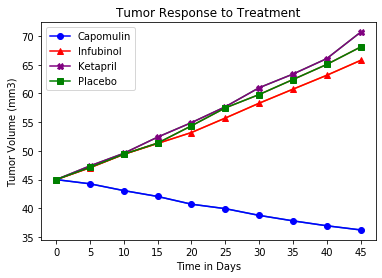

In [5]:
# Generate the Plot (with Error Bars)
tumor_response_pivot_small = tumor_response_pivot[["Capomulin","Infubinol","Ketapril","Placebo",]]

x_axis = np.arange(len(tumor_response_pivot_small))

tick_locations = [value for value in x_axis]
time_points = tumor_response_to_treatment["Timepoint"].unique()
plt.xticks(x_axis, time_points)

# Plot the chart with lables and title
plt.plot (x_axis, tumor_response_pivot_small)
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Define Handles
Capomulin_handle, = plt.plot(x_axis, tumor_response_pivot_small["Capomulin"], marker ='o', color='blue', label="Capomulin")
Infubinol_handle, = plt.plot(x_axis, tumor_response_pivot_small["Infubinol"], marker='^', color='red', label="Infubinol")
Ketapril_handle, = plt.plot(x_axis, tumor_response_pivot_small["Ketapril"], marker='X', color='purple', label="Ketapril")
Placebo_handle, = plt.plot(x_axis, tumor_response_pivot_small["Placebo"], marker='s', color='green', label="Placebo")

ax = plt.subplot(111)
ax.legend()

# ([Capomulin_handle, Infubinol_handle, Ketapril_handle,Placebo_handle])

# Save the Figure
plt.savefig("../Images/Treatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mouse_metastat_grouped = mouse_trial.groupby(["Drug","Timepoint"])
mean_metastat = mouse_trial_grouped[["Metastatic Sites"]].mean()

# Convert to DataFrame
metastatic_response_to_treatment = pd.DataFrame(mean_metastat)
metastatic_response_to_treatment.reset_index(inplace=True) 

# Preview DataFram
metastatic_response_to_treatment.head(100)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastat_value = (mouse_metastat_grouped["Metastatic Sites"]).sem()

# Convert to DataFrame
sem_metastat_value_df = pd.DataFrame(sem_metastat_value)

# Preview DataFrame
print(sem_metastat_value_df.head())

# And in a pivot format as well
sem_pivot =  sem_metastat_value_df.pivot_table("Metastatic Sites", "Timepoint","Drug")
sem_pivot_small = sem_pivot[["Capomulin","Infubinol","Ketapril","Placebo",]]
sem_pivot_small.head()

                     Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


In [8]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_pivot = metastatic_response_to_treatment.pivot_table("Metastatic Sites", "Timepoint","Drug")
metastatic_pivot_small = metastatic_pivot[["Capomulin","Infubinol","Ketapril","Placebo",]]
# Preview that Reformatting worked
metastatic_pivot_small.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


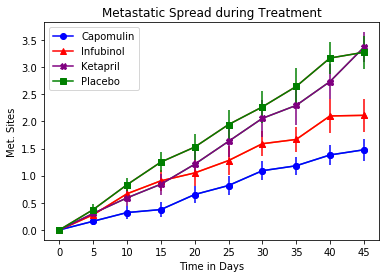

In [9]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(len(metastatic_pivot_small))

tick_locations = [value for value in x_axis]
time_points = metastatic_response_to_treatment["Timepoint"].unique()
plt.xticks(x_axis, time_points)

# Plot the chart with lables and title
plt.plot (x_axis, metastatic_pivot_small)
plt.xlabel("Time in Days")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread during Treatment")

# Define Handles
Capomulin_handle, = plt.plot(x_axis, metastatic_pivot_small["Capomulin"], marker ='o', color='blue', label="Capomulin")
Infubinol_handle, = plt.plot(x_axis, metastatic_pivot_small["Infubinol"], marker='^', color='red', label="Infubinol")
Ketapril_handle, = plt.plot(x_axis, metastatic_pivot_small["Ketapril"], marker='X', color='purple', label="Ketapril")
Placebo_handle, = plt.plot(x_axis, metastatic_pivot_small["Placebo"], marker='s', color='green', label="Placebo")

ax = plt.subplot(111)
ax.legend()

ax.errorbar(x_axis, metastatic_pivot_small["Capomulin"], yerr=sem_pivot_small["Capomulin"], fmt="o", color='blue')
ax.errorbar(x_axis, metastatic_pivot_small["Infubinol"], yerr=sem_pivot_small["Infubinol"], fmt="^", color='red')
ax.errorbar(x_axis, metastatic_pivot_small["Ketapril"], yerr=sem_pivot_small["Ketapril"], fmt="X", color='purple')
ax.errorbar(x_axis, metastatic_pivot_small["Placebo"], yerr=sem_pivot_small["Placebo"], fmt="s", color='green')

# Save the Figure
plt.savefig("../Images/Metastatic Spread.png")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_trial_grouped = mouse_trial.groupby(["Drug","Timepoint"])
mouse_count = mouse_trial_grouped[["Mouse ID"]].count()
mouse_count.reset_index(inplace=True)

# Convert to DataFrame
mouse_survival = pd.DataFrame(mouse_count.rename({"Mouse ID": "Mouse Count"},axis=1))

# Preview DataFrame
mouse_survival.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames

mouse_survival_pivot = pd.DataFrame(mouse_survival.pivot_table("Mouse Count", "Timepoint","Drug"))
mouse_survival_pivot_small = mouse_survival_pivot[["Capomulin","Infubinol","Ketapril","Placebo"]]

total_capomulin_mice = mouse_survival_pivot["Capomulin"].max()
total_Infubinol_mice = mouse_survival_pivot["Infubinol"].max()
total_Ketapril_mice = mouse_survival_pivot["Ketapril"].max()
total_Placebo_mice = mouse_survival_pivot["Placebo"].max()

mouse_survival_new = pd.DataFrame(mouse_survival)
mouse_survival_pivot.head()
# mouse_survival_pivot_small.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17


In [12]:
# Generate the Plot (Accounting for percentages))
mouse_survival_new["Survival Pct"] = mouse_survival["Mouse Count"]/total_capomulin_mice*100
mouse_survival_new.drop(mouse_survival_new.columns[[2]], axis=1, inplace=True)
mouse_survival_new.head(100)

mouse_survival_pivot_pc = pd.DataFrame(mouse_survival_new.pivot_table("Survival Pct", "Timepoint","Drug"))
mouse_survival_pivot_pc_small = mouse_survival_pivot_pc[["Capomulin","Infubinol","Ketapril","Placebo"]]
mouse_survival_pivot_pc_small.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


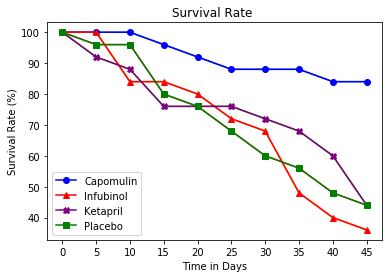

In [13]:
x_axis = np.arange(len(mouse_survival_pivot_pc_small))
x_axis
tick_locations = [value for value in x_axis]
time_points = tumor_response_to_treatment["Timepoint"].unique()
plt.xticks(x_axis, time_points)

# Plot the chart with lables and title
plt.plot (x_axis, mouse_survival_pivot_pc_small)
plt.xlabel("Time in Days")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate ")

# Define Handles
Capomulin_handle_s, = plt.plot(x_axis, mouse_survival_pivot_pc_small["Capomulin"], marker ='o', color='blue', label="Capomulin")
Infubinol_handle_s, = plt.plot(x_axis, mouse_survival_pivot_pc_small["Infubinol"], marker='^', color='red', label="Infubinol")
Ketapril_handle_s, = plt.plot(x_axis, mouse_survival_pivot_pc_small["Ketapril"], marker='X', color='purple', label="Ketapril")
Placebo_handle_s, = plt.plot(x_axis, mouse_survival_pivot_pc_small["Placebo"], marker='s', color='green', label="Placebo")

ax = plt.subplot(111)
ax.legend()

# Save the Figure
plt.savefig("../Images/Survival.png")

# Show the Figure
# plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
drug_columns = mouse_survival_pivot_pc.columns

drugs = []
pct_changes = []

for col in drug_columns:
    drug_name = col
    start_count = tumor_response_pivot.loc[0,col]
    end_count = tumor_response_pivot.loc[45,col]
    pct_change = round(-(1-(end_count)/start_count)*100,4)
    drugs.append(col)
    pct_changes.append(pct_change)
#     print(drug_name, start_count, end_count,pct_change)
    
summary_data = pd.DataFrame({"Drug": drugs, "Pct Change": pct_changes}).sort_values("Drug", ascending=True)

# Display the data to confirm
summary_data

,Drug,Pct Change
0,Capomulin,-19.4753
1,Ceftamin,42.5165
2,Infubinol,46.1235
3,Ketapril,57.0288
4,Naftisol,53.9233
5,Placebo,51.2980
6,Propriva,47.2412
7,Ramicane,-22.3209
8,Stelasyn,52.0851
9,Zoniferol,46.5798


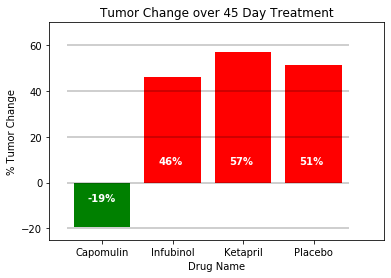

In [15]:
# Store all Relevant Percent Changes into a Tuple
x_tuple = tuple(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
y_tuple = tuple((summary_data.iloc[0,1],summary_data.iloc[2,1],summary_data.iloc[3,1],summary_data.iloc[5,1]))

tick_locations = np.arange(0, 4, 1) #[value for value in x_tuple]
plt.xticks(tick_locations, x_tuple)

h_lines = np.arange(-20, 80, 20)
for h in h_lines:
    plt.hlines(h, -0.5, 3.5, alpha=0.25)

# Orient widths. Add labels, tick marks, etc. 
plt.xlabel("Drug Name")
plt.ylabel("% Tumor Change")
plt.title("Tumor Change over 45 Day Treatment")

# Set the limits of the x axis
plt.xlim(-0.75, 4)
# Set the limits of the y axis
plt.ylim(-25, 70)

# Use functions to label the percentages of changes
# Call functions to implement the function calls

ax = plt.subplot(111)
my_label = str

for i in tick_locations:
    my_label = f"{int(y_tuple[i])}%"
    if y_tuple[i] <= 0:
        plt.bar(x_tuple[0], y_tuple[0], color = 'g', align="center")
        ax.text(tick_locations[i]-0.20, -8, my_label, fontsize=10, color='white',weight='bold')
    if y_tuple[i] > 0:
        plt.bar(x_tuple[1:4], y_tuple[1:4], color = 'r', align="center")
        ax.text(tick_locations[i]-0.20, 8, my_label, fontsize=10, color='white',weight='bold')

# Save the Figure
plt.savefig("../Images/Tumor Change.png")

# Show the Figure
# fig.show()
                            

![Metastatic Spread During Treatment](../Images/change.png)

# Conclusions: